In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks")

# Building structured multi-plot grids
다차원 데이터를 탐색할 때 유용한 접근 방식은 데이터 집합의 서로 다른 하위 집합에 동일한 플롯의 여러 인스턴스를 그리는 것입니다.  
이 기법을 '격자(lattice)' 또는 '격자(trellis)' 플로팅이라고도 하며, '작은 배수(small multiples)'라는 개념과 관련이 있습니다.  
이를 통해 뷰어는 복잡한 데이터 집합에 대한 많은 양의 정보를 빠르게 추출할 수 있습니다.  

Matplotlib은 여러 축을 가진 그림을 만드는 데 탁월한 지원을 제공하며, seaborn은 이를 기반으로 플롯의 구조를 데이터 집합의 구조에 직접 연결합니다.

figure level 함수는 아래에서 설명할 객체 위에 구축됩니다. 대부분의 경우 이러한 함수를 사용하여 작업하고 싶을 것입니다.  
이러한 함수는 각 그리드의 여러 플롯을 동기화하는 몇 가지 중요한 부기 작업을 처리합니다.  
이 장에서는 고급 응용 프로그램에 유용할 수 있는 기본 개체의 작동 방식을 설명합니다.

## Conditional small multiples
FacetGrid 클래스는 데이터 집합의 하위 집합 내에서 변수의 분포 또는 여러 변수 간의 관계를 개별적으로 시각화하려는 경우에 유용합니다.  
패싯그리드는 행(row), 열(col), 색조(hue) 등 최대 세 가지 차원으로 그릴 수 있습니다.  
행과 열은 결과 축 배열과 명확하게 대응하며, 색조 변수는 깊이 축을 따라 서로 다른 레벨이 서로 다른 색상으로 그려지는 세 번째 차원으로 생각하면 됩니다.

relplot(), displot(), catplot(), lmplot() 각각은 내부적으로 이 객체를 사용하며, 작업이 완료되면 객체를 반환하여 추가 조정에 사용할 수 있도록 합니다.  

이 클래스는 데이터 프레임과 그리드의 행, 열 또는 색조 차원을 형성할 변수 이름으로 FacetGrid 객체를 초기화하여 사용됩니다.  
이러한 변수는 범주형 또는 불연속형이어야 하며, 변수의 각 레벨에 있는 데이터는 해당 축을 따라 패싯에 사용됩니다.  
예를 들어 팁 데이터 집합에서 점심과 저녁의 차이를 조사하고 싶다고 가정해 보겠습니다:

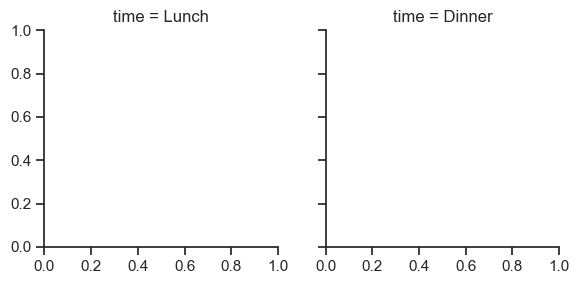

In [2]:
# matplotlib 그림과 축을 설정한 초기화된 그리드

tips = sns.load_dataset("tips")
g = sns.FacetGrid(tips, col="time")

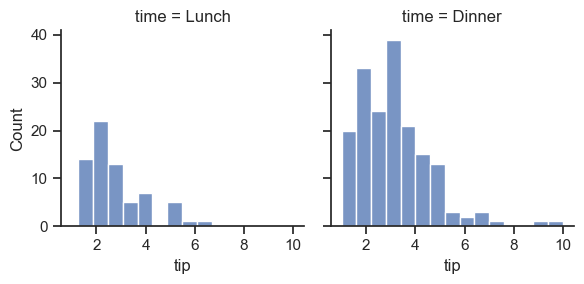

In [3]:
# FacetGrid.map() 메서드를 사용한 시각화
# 플로팅 함수(histplot)와, 데이터 변수명(tip) 입력

g = sns.FacetGrid(tips, col="time")
g.map(sns.histplot, "tip")

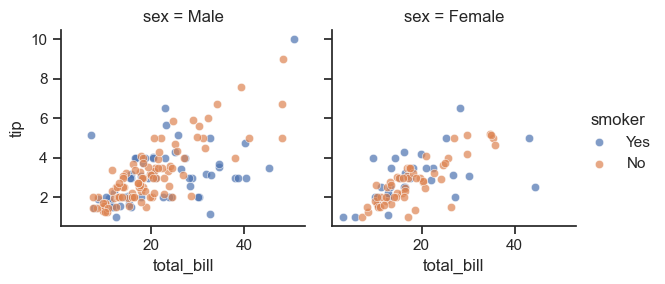

In [4]:
# 그래프 + 축에 주석 추가
# 관계형 플롯을 만들려면 여러 변수 이름과 키워드 전달
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(sns.scatterplot, "total_bill", "tip", alpha=.7)
g.add_legend()

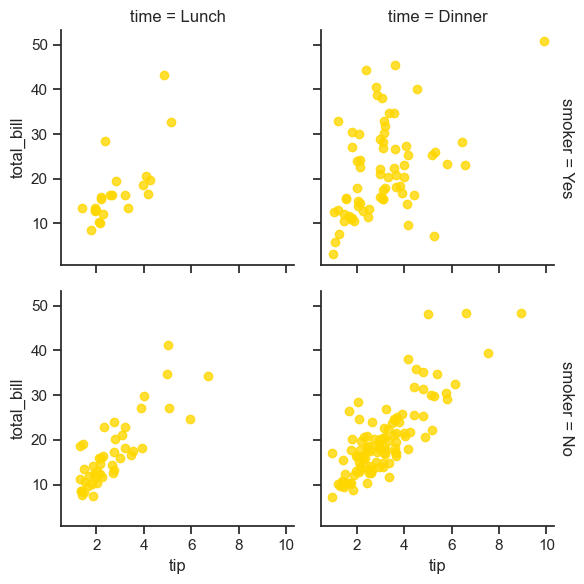

In [5]:
# 그리드 제어 옵션
# margin_titles는 matplotlib API에서 공식적으로 지원되지 않으며 모든 경우에 제대로 작동하지 않을 수 있으며 특히, 현재 플롯 외부에 있는 범례에는 사용할 수 없습니다.

g = sns.FacetGrid(tips, row="smoker", col="time", margin_titles=True)
g.map(sns.regplot, "tip", "total_bill", color="gold", fit_reg = False, x_jitter=.2)

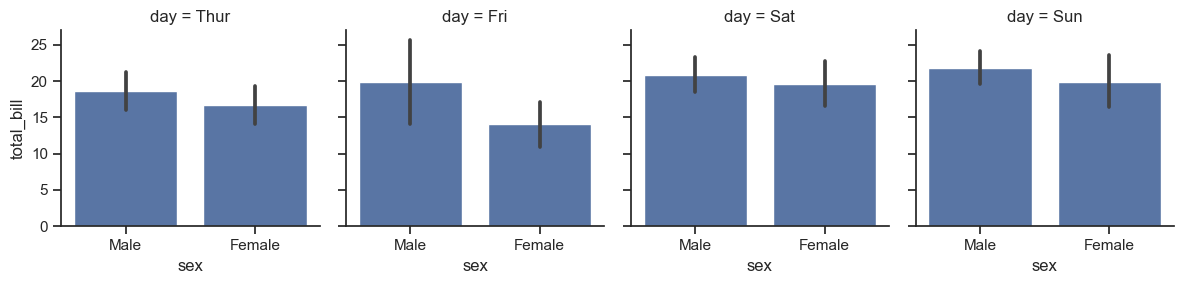

In [6]:
# 그래프 크기는 가로 세로 비율과 함께 각 패싯의 높이 입력

g = sns.FacetGrid(tips, col="day", height=3, aspect=1)
g.map(sns.barplot, "sex", "total_bill", order=["Male", "Female"])

CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category')


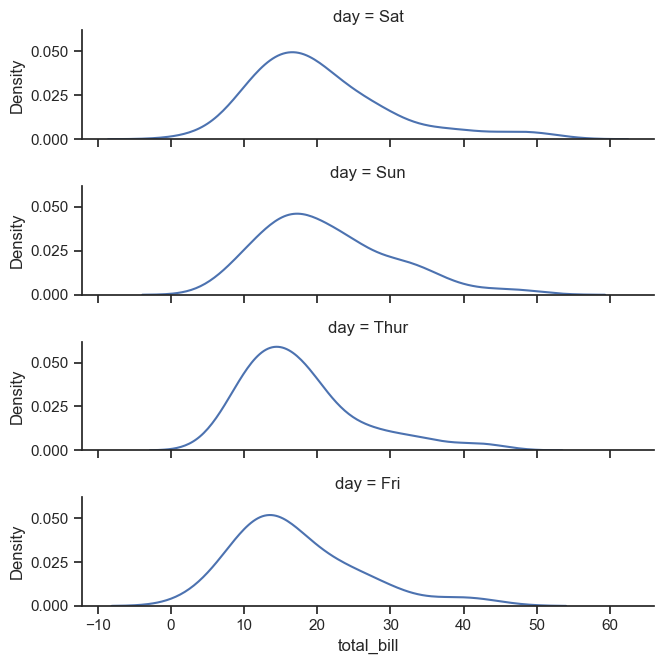

In [7]:
# 패싯의 기본 순서는 데이터프레임의 정보에서 파생됩니다. 
# 패싯을 정의하는 데 사용되는 변수에 범주형 유형이 있는 경우 범주의 순서가 사용됩니다. 
# 그렇지 않으면 패싯은 범주 수준이 나타나는 순서대로 표시됩니다. 
# 그러나 적절한 *_order 매개 변수를 사용하여 패싯 차원의 순서를 지정할 수 있습니다:

ordered_days = tips.day.value_counts().index
print(ordered_days)
g = sns.FacetGrid(tips, row="day", row_order=ordered_days,
                  height=1.7, aspect=4,)
g.map(sns.kdeplot, "total_bill")


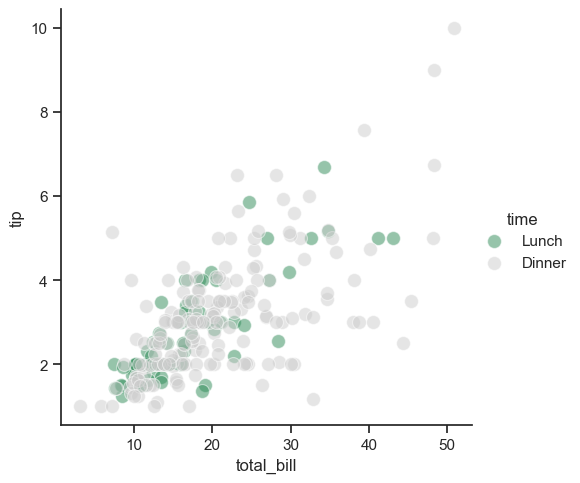

In [8]:
# 모든 색 팔레트(즉, color_palette()에 전달할 수 있는 것) 제공 가능
# 색조(hue)에 전달하는 색 팔레트를 딕셔너리로 커스텀 매핑해 사용할 수도 있음:

pal = dict(Lunch="seagreen", Dinner=".8")
g = sns.FacetGrid(tips, hue="time", palette=pal, height=5)
g.map(sns.scatterplot, "total_bill", "tip", s=100, alpha=.5)
g.add_legend()

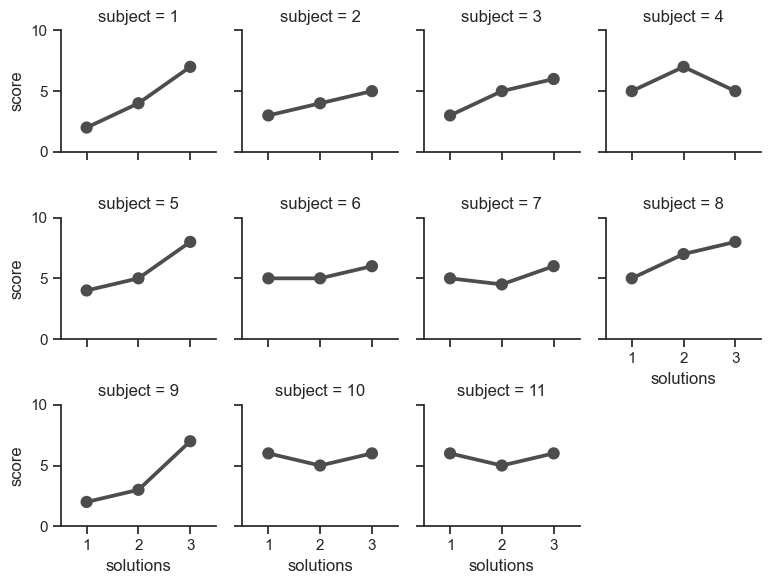

In [9]:
# 한 변수에 여러 레벨이 있는 경우 열을 따라 플롯하되 여러 행에 걸쳐 있도록 '래핑' 가능
# 이 경우 행(row) 변수는 사용 불가

attend = sns.load_dataset("attention").query("subject <= 11")
g = sns.FacetGrid(attend, col="subject", col_wrap=4, height=2, ylim=(0, 10))
g.map(sns.pointplot, "solutions", "score", order=[1, 2, 3], color=".3", errorbar=None)

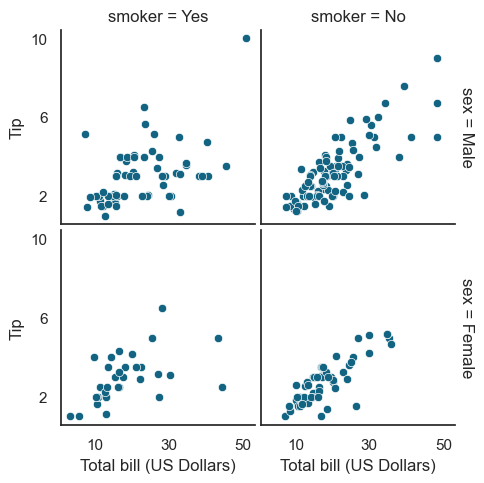

In [10]:
# FacetGrid.map()을 여러번 사용하여 플롯을 그린 후에는 플롯의 일부만 조정하고 싶을 수 있습니다.
# 더 높은 추상화 수준에서 그림을 조작하기 위한 여러 가지 메서드도 FacetGrid 객체에 있습니다. 
# 가장 일반적인 메서드는 FacetGrid.set()이며, 내부 패싯에 축 레이블이 없다는 점을 고려한 FacetGrid.set_axis_labels()와 같은 좀 더 특수한 메서드도 있습니다.

with sns.axes_style("white"):
    g = sns.FacetGrid(tips, row="sex", col="smoker", margin_titles=True, height=2.5)
g.map(sns.scatterplot, "total_bill", "tip", color="#126482")
g.set_axis_labels("Total bill (US Dollars)", "Tip")
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10])
g.figure.subplots_adjust(wspace=.03, hspace=.03) # 플롯 간격

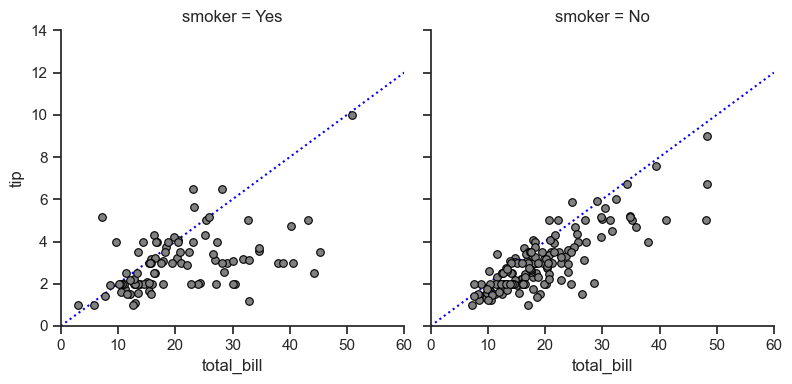

In [11]:
# + 각각 figure 및 axes_dict에 멤버 속성으로 저장되어 있는 matplotlib Figure 및 Axes 객체를 사용하여 직접 커스텀 가능
# 행이나 열 패싯이 없는 그림을 만들 때 ax 속성을 사용하여 단일 축에 직접 액세스할 수도 있습니다.

g = sns.FacetGrid(tips, col="smoker", margin_titles=True, height=4)
g.map(plt.scatter, "total_bill", "tip", color="gray", edgecolor="black", s=30, lw=0.8)
for ax in g.axes_dict.values():
    ax.axline((0, 0), slope=.2, c="blue", ls=":", zorder=0)
g.set(xlim=(0, 60), ylim=(0, 14))

## Using custom functions
FacetGrid를 사용할 때 기존의 matplotlib 및 seaborn 함수에 국한되지 않습니다.  
하지만 제대로 작동하려면 사용하는 함수가 몇 가지 규칙을 따라야 합니다: 

1. "현재 활성" matplotlib 축에 그려야 합니다. 이는 matplotlib.pyplot 네임스페이스에 있는 함수에 해당되며, 해당 메서드로 직접 작업하려는 경우 matplotlib.pyplot.gca()를 호출하여 현재 축에 대한 참조를 가져올 수 있습니다.

2. 위치 인자로 플롯하는 데이터를 받아들여야 합니다. 내부적으로 FacetGrid는 명명된 위치 인자 각각에 대한 일련의 데이터를 FacetGrid.map()에 전달합니다.

3. 색상과 레이블 키워드 인수를 받을 수 있어야 하며, 이상적으로는 이 인수를 사용해 유용한 작업을 수행할 수 있어야 합니다. 대부분의 경우 **kwargs의 일반 사전을 가져와 기본 플로팅 함수에 전달하는 것이 가장 쉽습니다.

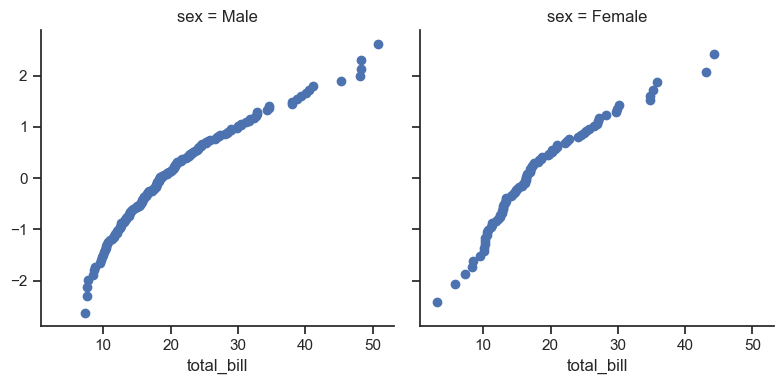

In [12]:
# 플로팅할 수 있는 함수 최소한의 예
# 각 패싯에 대해 단일 벡터 데이터 사용

from scipy import stats
def quantile_plot(x, **kwargs):
    quantiles, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, quantiles, **kwargs)

g = sns.FacetGrid(tips, col="sex", height=4)
g.map(quantile_plot, "total_bill")

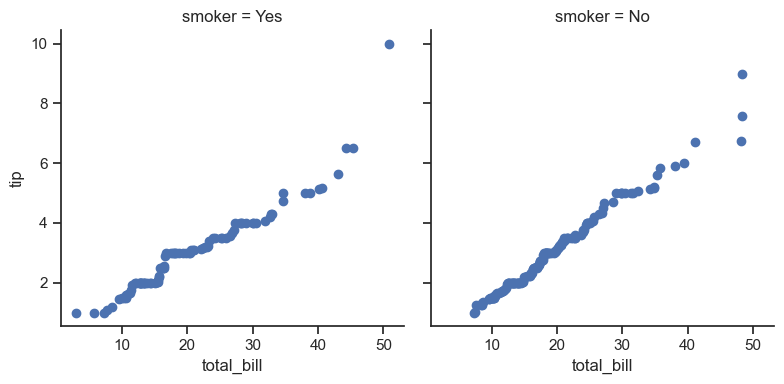

In [13]:
# 이변량 플롯을 만들려면 먼저 X축 변수를 사용하고 두 번째로 Y축 변수를 사용하도록 함수 작성
def qqplot(x, y, **kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr, **kwargs)

g = sns.FacetGrid(tips, col="smoker", height=4)
g.map(qqplot, "total_bill", "tip")

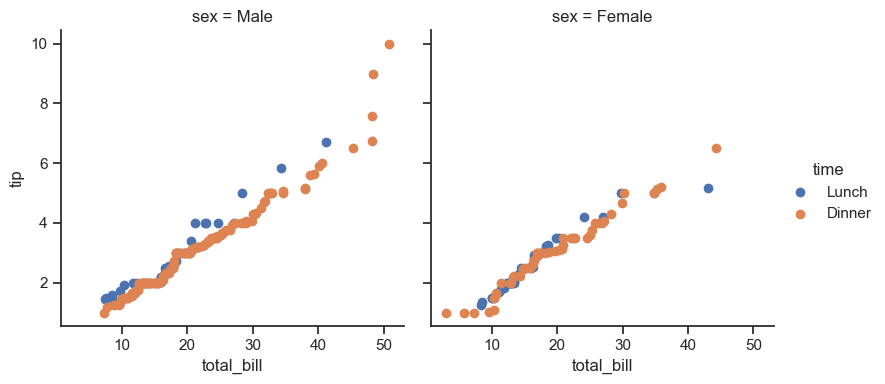

In [14]:
# matplotlib.pyplot.scatter()는 색상 및 레이블 키워드 인수를 받아들이는 작업 수행이 가능하므로 색조 패싯을 추가할 수 있음

g = sns.FacetGrid(tips, hue="time", col="sex", height=4)
g.map(qqplot, "total_bill", "tip")
g.add_legend()

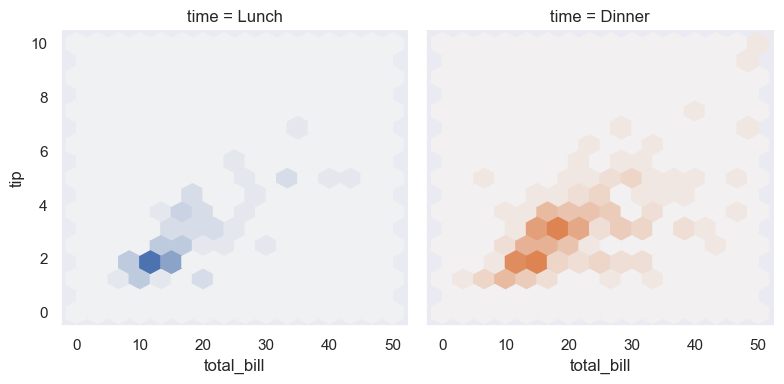

In [15]:
# 하지만 때로는 색상 및 레이블 키워드 인수를 사용하여 예상한 대로 작동하지 않는 함수를 매핑하고 싶을 때가 있습니다. 
# 이 경우 이러한 인수를 명시적으로 포착하여 사용자 정의 함수의 로직에서 처리해야 합니다. 
# 예를 들어, 이 접근 방식을 사용하면 FacetGrid API와 잘 작동하지 않는 matplotlib.pyplot.hexbin()을 매핑하는 데 사용할 수 있습니다:

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    g = sns.FacetGrid(tips, hue="time", col="time", height=4)
g.map(hexbin, "total_bill", "tip", extent=[0, 50, 0, 10]);

## Plotting pairwise data relationships

페어그리드를 사용하면 동일한 플롯 유형을 사용하여 작은 하위 플롯의 그리드를 빠르게 그려 각각의 데이터를 시각화할 수 있습니다.  
페어그리드에서는 각 행과 열이 서로 다른 변수에 할당되므로 결과 플롯은 데이터 집합의 각 페어 관계를 표시합니다.  
이 플롯 스타일은 각 관계를 표시하는 가장 일반적인 방법이기 때문에 '분산형 차트 행렬'이라고도 하지만, 페어그리드는 분산형 차트에만 국한되지 않습니다.

패싯그리드와 페어그리드의 차이점을 이해하는 것이 중요합니다. 전자의 경우 각 패싯은 다른 변수의 다른 수준에 따라 조건이 지정된 동일한 관계를 표시합니다.  
후자의 경우 각 플롯은 서로 다른 관계를 보여줍니다(위쪽 삼각형과 아래쪽 삼각형은 미러 플롯이 되지만).  
페어그리드를 사용하면 데이터 집합의 흥미로운 관계를 매우 빠르고 매우 높은 수준으로 요약해 볼 수 있습니다. 

클래스의 기본 사용법은 FacetGrid와 매우 유사합니다. 먼저 그리드를 초기화한 다음 플로팅 함수를 맵 메서드에 전달하면 각 서브플롯에서 호출됩니다.  
더 빠른 플롯을 위해 약간의 유연성을 희생하는 동반 함수인 pairplot()도 있습니다.

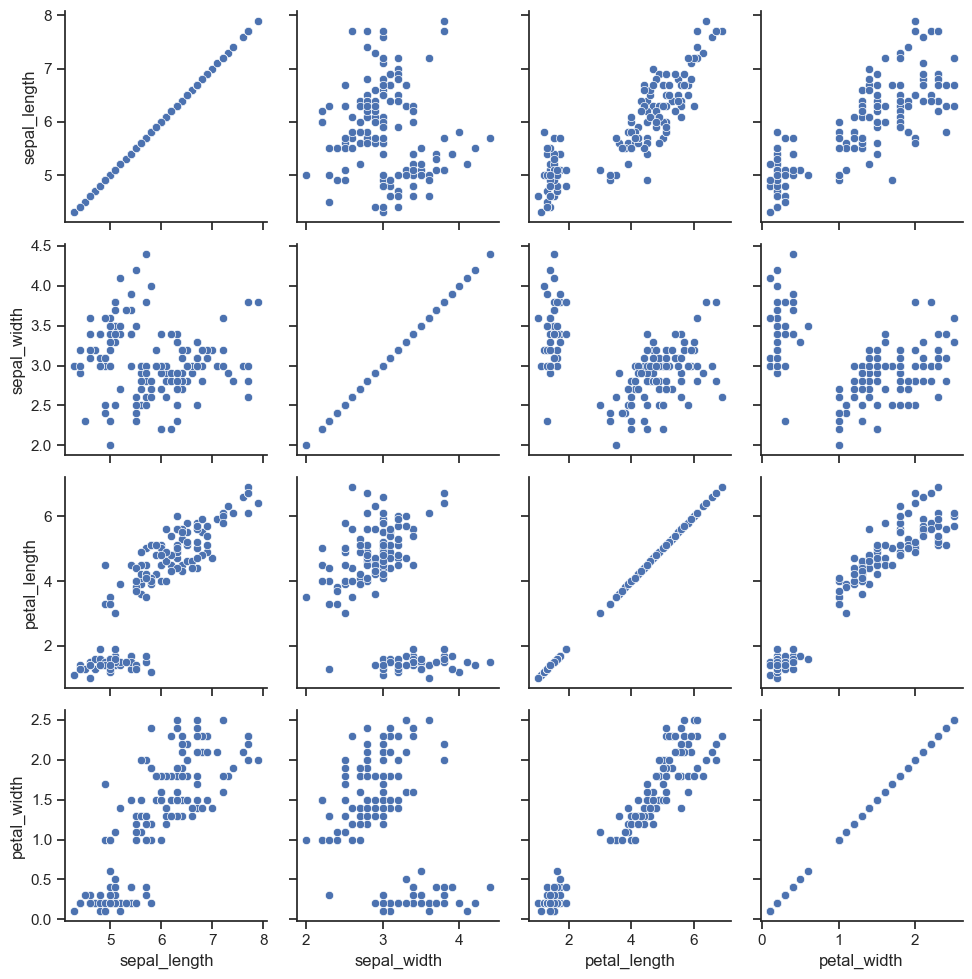

In [16]:
iris = sns.load_dataset("iris")
g = sns.PairGrid(iris)
g.map(sns.scatterplot)

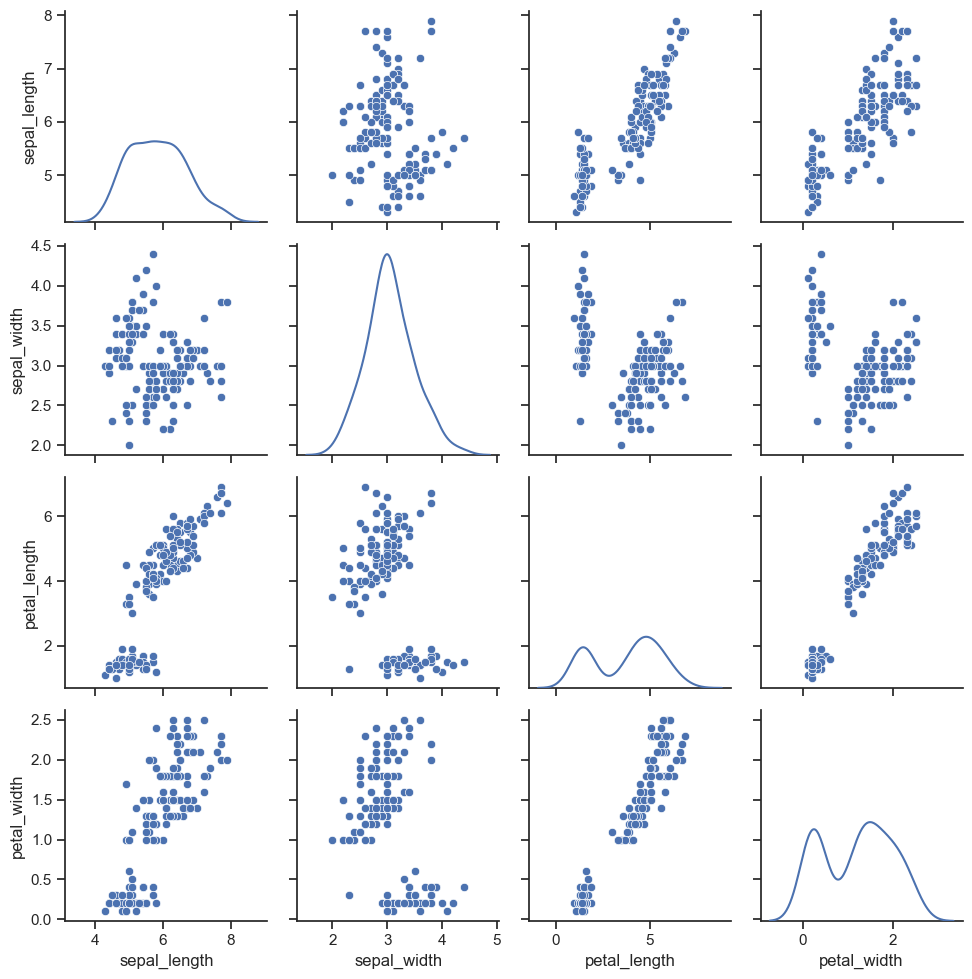

In [21]:
# 대각선에 다른 형태의 플롯을 그려 각 열별 변수의 단변량 분포 표시 가능. 하지만 축 눈금은 이 플롯의 개수 또는 밀도 축과 일치하지 않는다는 점 유의
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot) # 대각선 플롯 형태 선택, '단변량'분포인 것 인지하기
g.map_offdiag(sns.scatterplot) # 그 외 플롯 형태 선택

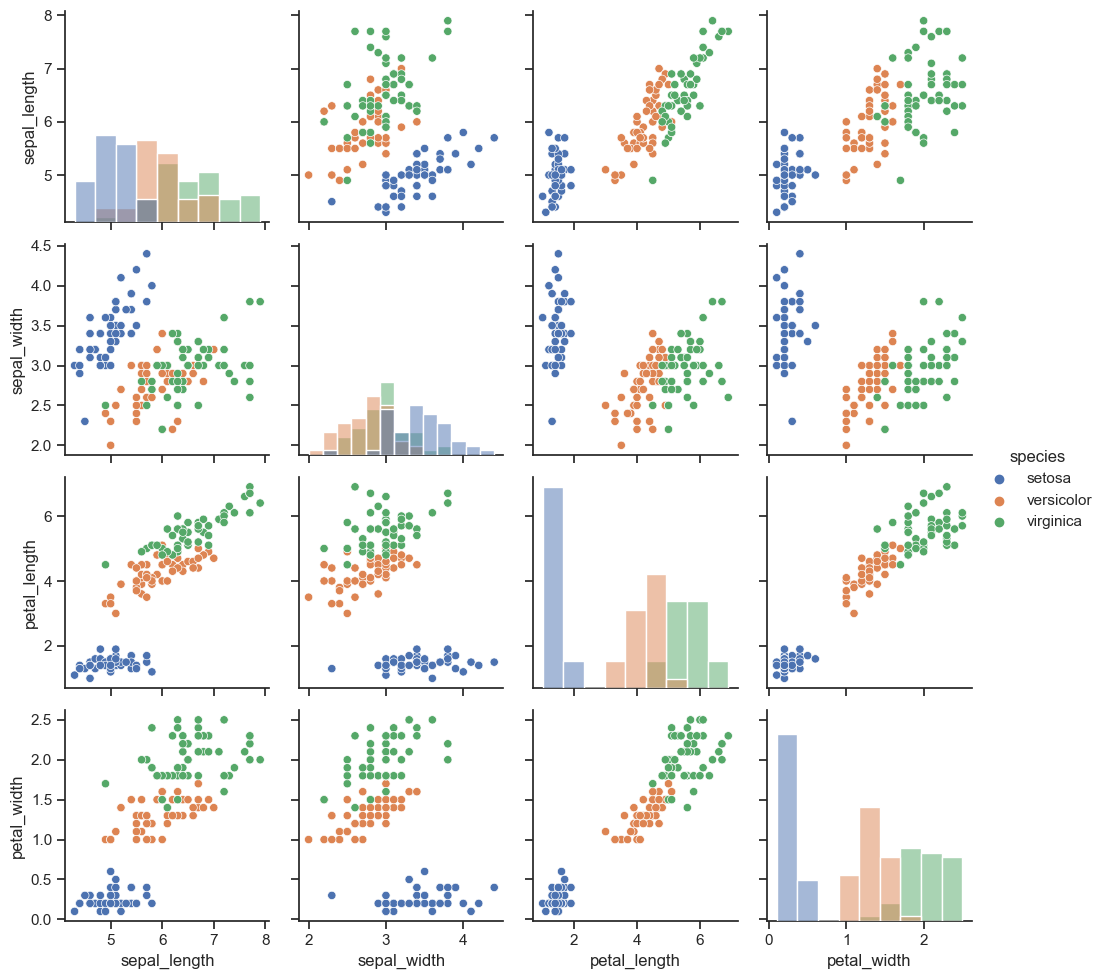

In [22]:
# 일반적인 사용법 : 관측값에 별도의 범주형 변수로 색상 지정
# 아이리스 데이터 집합에 있는 세 가지 다른 종류의 꽃에 대한 네 가지 측정값이 서로 어떻게 다른지 확인

g = sns.PairGrid(iris, hue="species")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

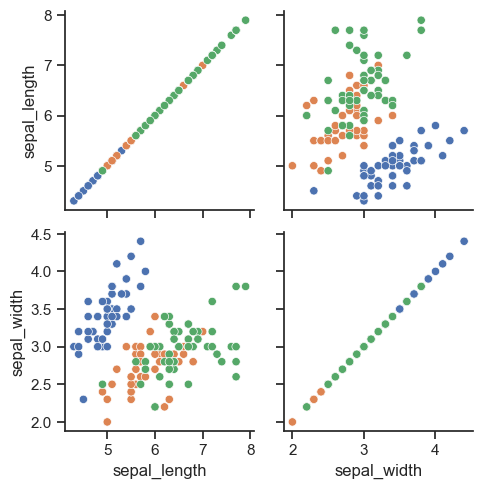

In [23]:
# 기본적으로 데이터 집합의 모든 숫자 열이 사용되지만 일부 선택도 얼마든지 가능

g = sns.PairGrid(iris, vars=["sepal_length", "sepal_width"], hue="species")
g.map(sns.scatterplot)

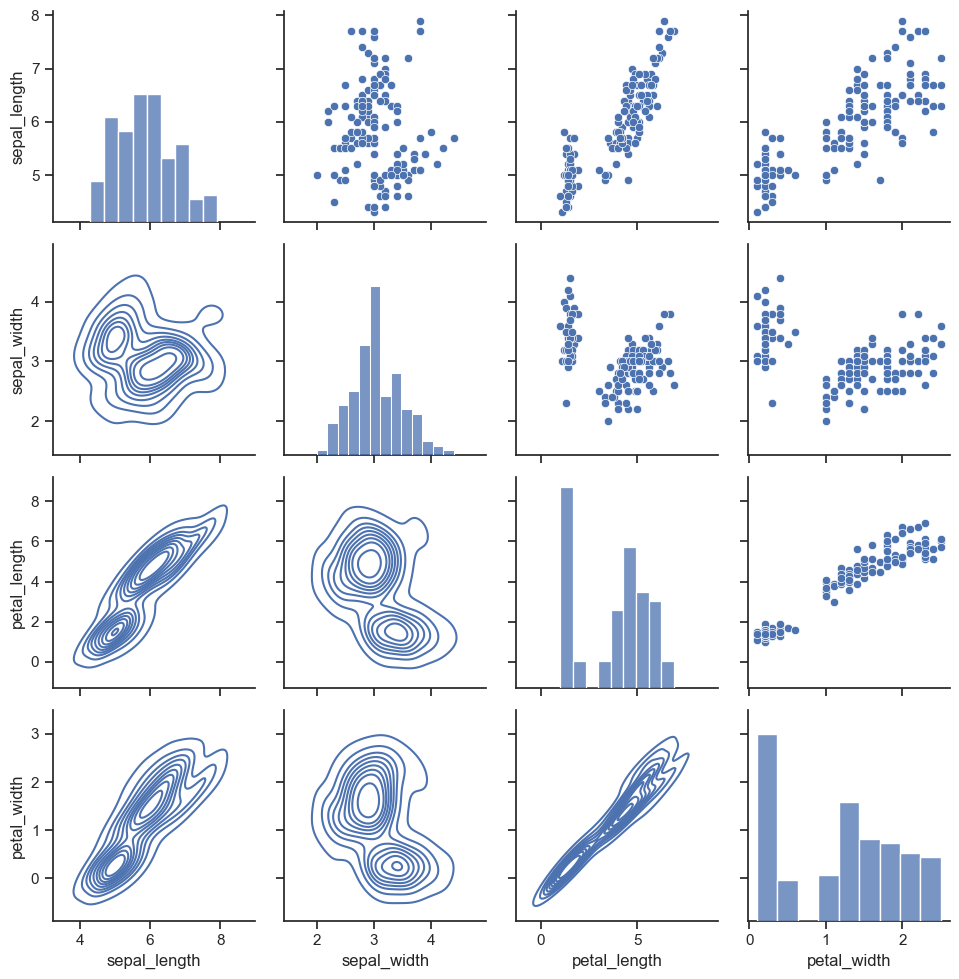

In [26]:
# 위쪽 삼각형과 아래쪽 삼각형에 다른 형태의 플롯을 그려 관계를 다른 측면으로 살필 수 있음

g = sns.PairGrid(iris)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)

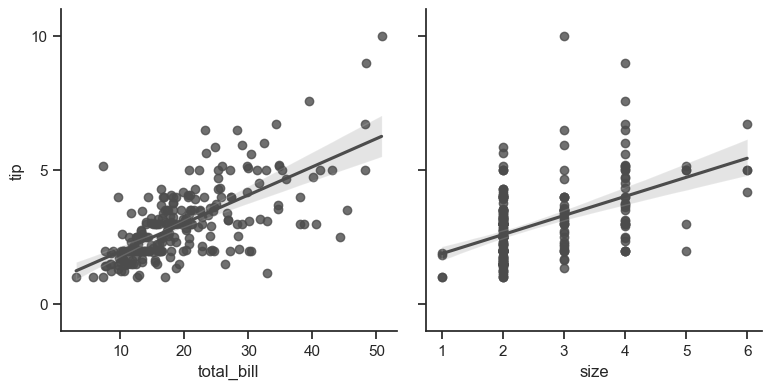

In [30]:
# 대각선에 ID 관계가 있는 정사각형 그리드는 실제로는 특수한 경우일 뿐이며 행과 열에 다른 변수를 사용하여 그릴 수 있습니다.
g = sns.PairGrid(tips, y_vars=["tip"], x_vars=["total_bill", "size"], height=4)
g.map(sns.regplot, color=".3")
g.set(ylim=(-1, 11), yticks=[0, 5, 10])

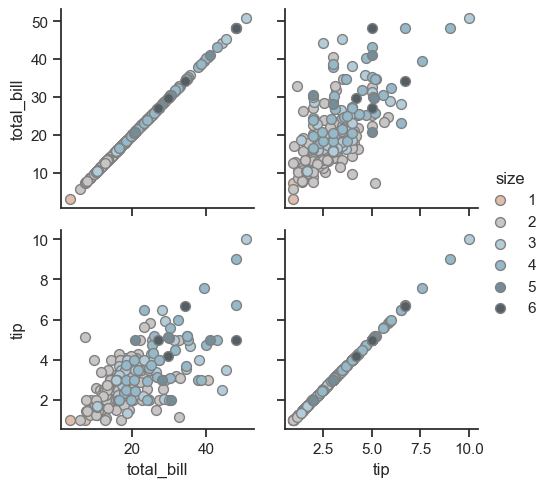

In [33]:
# aesthetic attributes 구현 가능
# 예를 들어 색조 변수의 순서를 표시하기 위해 다른 팔레트(palette)를 사용하고 키워드 인수(s, edgecolor)를 플로팅 함수에 전달할 수 있습니다.

g = sns.PairGrid(tips, hue="size", palette="RdBu_d")
g.map(plt.scatter, s=50, edgecolor="gray")
g.add_legend()

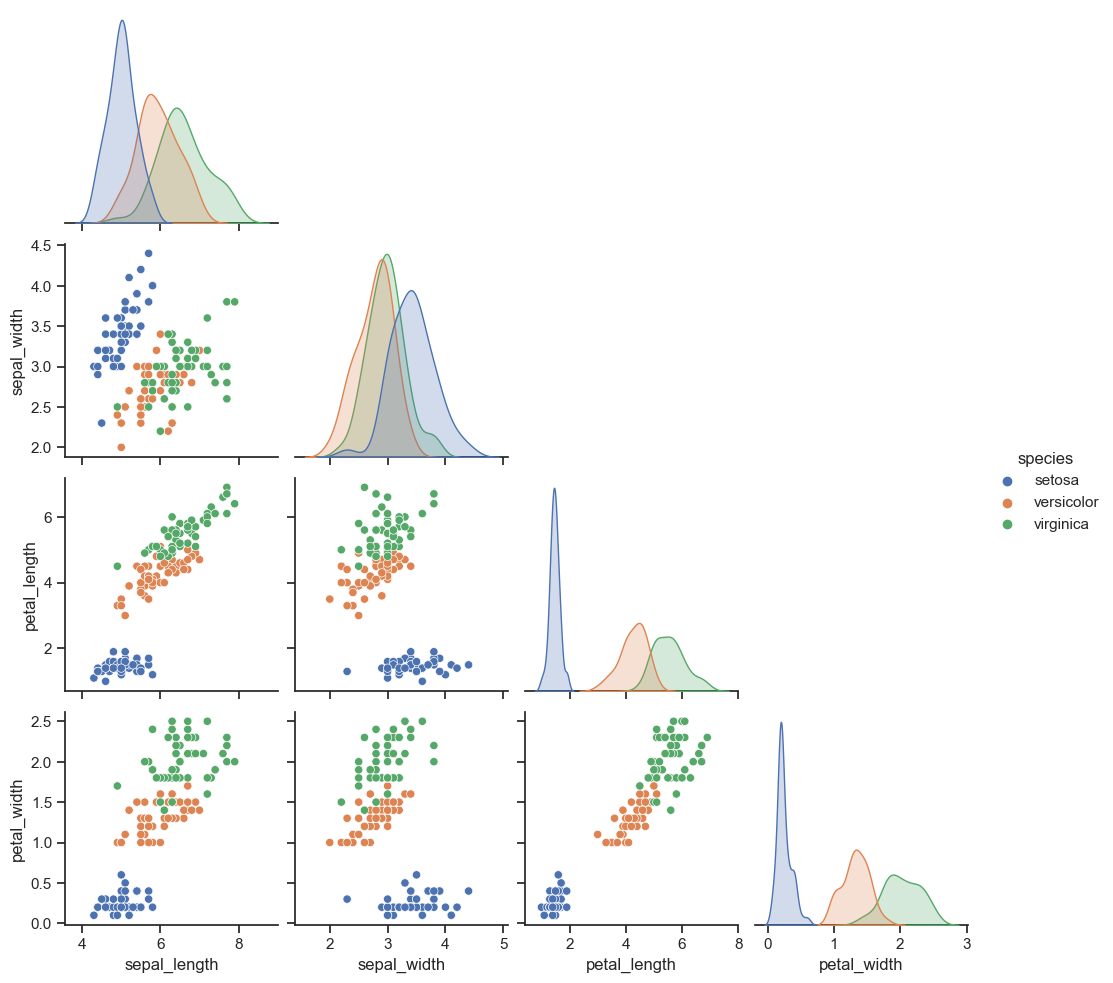

In [37]:
# PairGrid는 유연하지만, 데이터 집합을 빠르게 살펴보려면 pairplot()을 사용하는 것이 더 쉬울 수 있습니다.  
# 이 함수는 기본적으로 산점도와 히스토그램을 사용하지만, 몇 가지 다른 종류가 추가될 예정입니다(현재는 대각선 바깥쪽의 회귀 플롯과 대각선 안쪽의 KDE도 그릴 수 있습니다).

sns.pairplot(iris, hue="species", height=2.5, corner= True)

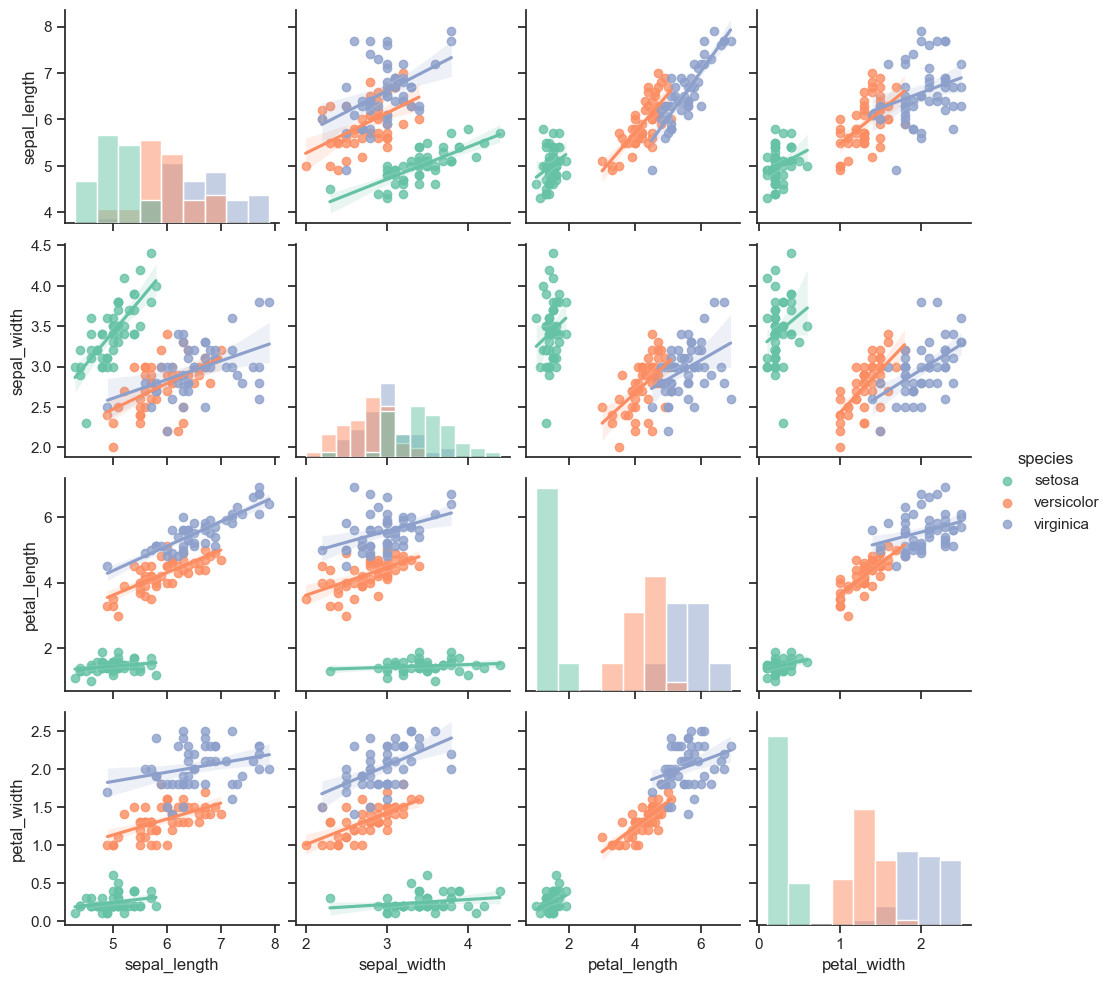

In [38]:
# aesthetics 설정 가능, 추가 조정을 위해 PairGrid 인스턴스 반환

g = sns.pairplot(iris, hue="species", palette="Set2", diag_kind="hist", height=2.5, kind='reg')